In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
#import mpld3
#from bokeh.charts import BoxPlot
#from bokeh.plotting import figure, output_file, show, ColumnDataSource
#from bokeh.models import HoverTool

%matplotlib inline

# Random data

In [2]:
mu, sigma, n_test, n_card = 40, 5, 11, 15
df = pd.DataFrame(columns=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'])
name = list()
for i in range(n_card):
    x = np.random.normal(mu, sigma, n_test) + 5*np.arange(n_test)
    df.loc[i] = x+i*4
    name.insert(i, 'Card'+str(i))
df.index = name
df

,A,B,C,D,E,F,G,H,I,J,K
Card0,49.308305,37.461726,45.882426,55.246349,65.243000,62.844960,70.926328,76.172581,73.239953,89.317368,93.092268
Card1,48.115220,50.449023,46.424257,53.065865,59.521152,70.505215,76.281607,70.262195,78.758517,97.959666,95.224059
Card2,49.590846,56.136082,57.153720,62.334324,67.082413,64.621966,74.293043,80.820999,84.564404,85.487333,97.165666
Card3,56.282931,65.234126,63.586244,60.856576,78.243400,80.643137,83.685049,77.308465,95.046360,91.976220,105.136747
Card4,51.989084,64.410025,64.168936,62.597532,78.496161,80.901151,84.704194,81.742519,88.785548,101.542220,95.888879
Card5,66.565322,61.061917,64.539398,69.563019,83.798521,78.787223,93.782841,101.601299,96.624031,96.866501,107.499348
Card6,64.866856,63.762661,75.304104,89.128982,81.498403,93.286975,92.619314,105.888680,103.735849,96.115313,116.187661
Card7,67.366965,67.958679,77.993006,79.164337,87.565271,103.880748,97.306816,99.275609,114.618697,116.435876,128.573975
Card8,73.611709,76.766280,75.602945,84.868988,90.880104,91.999637,97.626886,105.893945,109.399067,114.181976,122.835793
Card9,85.478568,87.012036,83.345032,89.607758,91.753501,104.889753,109.289633,110.676349,119.341379,123.313935,120.237083


# Real data

In [70]:
df = pd.read_excel("rawdata.xlsx")
df.set_index("Kort", inplace=True)
df

,Dragon Age,The Division,Far Cry Primal,Assassin's Creed,The Witcher 3,Metro: Last Light Redux,Rise of the Tomb Raider,Middle-earth: Shadow of Mordor,Fallout 4,Hitman,Grand Theft Auto V
Kort,,,,,,,,,,,
Asus GTX 1080 Strix OC,71,76,80,83,101,105,89,115,78,80,87
EVGA GTX 1080 SC ACX 3.0,70,75,78,82,99,103,87,113,77,78,87
Gigabyte GTX 1080 G1,70,75,78,81,100,103,87,113,76,80,86
MSI GTX 1080 Gaming X,69,74,77,81,99,104,87,113,76,79,85
Geforce GTX 1080,67,71,75,77,96,99,85,110,73,76,83
Gainward GTX 1070 Phoenix GLH,59,64,66,70,83,90,75,97,67,66,73
Geforce GTX 1070,54,59,61,64,76,82,69,89,63,60,67
Radeon R9 Fury X,43,55,57,45,72,74,53,82,57,67,55
Radeon R9 390X,38,44,49,41,56,60,46,69,47,54,48


# Normalize dataframe to mean per game

In [71]:
mean_per_game = df.mean('index')
df = 100*np.round(df.div(mean_per_game),3)

# Sort cards by median
df['median'] = df.median('columns') # temp
df.sort_values(by=['median'], inplace = True)
df.drop('median', axis = 1, inplace = True)
df

,Dragon Age,The Division,Far Cry Primal,Assassin's Creed,The Witcher 3,Metro: Last Light Redux,Rise of the Tomb Raider,Middle-earth: Shadow of Mordor,Fallout 4,Hitman,Grand Theft Auto V
Kort,,,,,,,,,,,
Geforce GTX 960,39.8,41.0,39.3,42.2,36.8,38.7,40.6,38.5,41.3,36.5,38.3
Radeon RX 480,60.7,73.4,70.4,66.5,67.0,64.9,67.6,69.0,69.4,79.3,59.7
Geforce GTX 1060,73.9,73.4,73.7,79.5,69.6,73.6,73.6,73.5,74.4,69.7,75.0
Radeon R9 390X,72.0,75.1,80.2,66.5,73.5,74.8,69.1,78.0,77.7,85.6,73.5
Radeon R9 Fury X,81.5,93.9,93.3,73.0,94.5,92.3,79.6,92.7,94.2,106.2,84.2
Geforce GTX 1070,102.4,100.7,99.9,103.8,99.8,102.3,103.6,100.7,104.1,95.1,102.6
Gainward GTX 1070 Phoenix GLH,111.8,109.2,108.0,113.5,109.0,112.3,112.6,109.7,110.7,104.6,111.7
Geforce GTX 1080,127.0,121.2,122.8,124.9,126.0,123.5,127.7,124.4,120.7,120.5,127.0
EVGA GTX 1080 SC ACX 3.0,132.7,128.0,127.7,133.0,130.0,128.5,130.7,127.8,127.3,123.6,133.2


# Only median

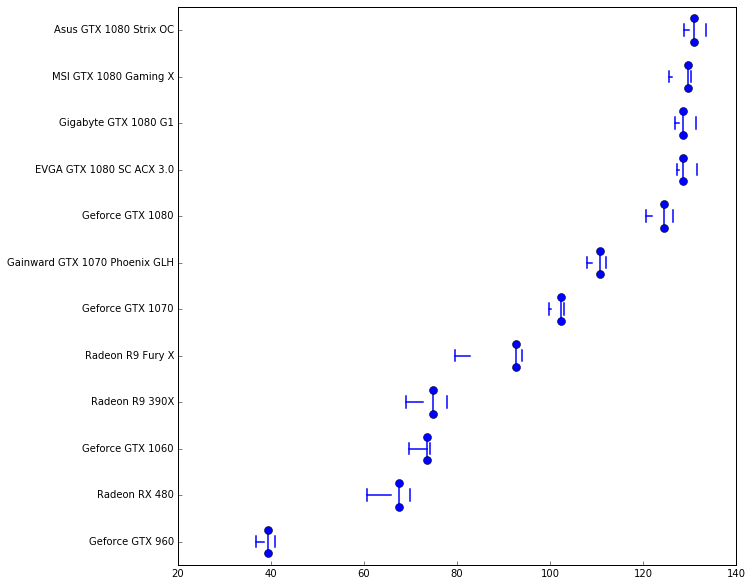

In [72]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1, 1, 1)
bp1 = ax1.boxplot(df.T.as_matrix(), notch=False, vert=False, whis=[0.5-0.68/2, 0.5+0.68/2], showbox = False, showfliers = False)
plt.setp(bp1['whiskers'], linestyle='-', linewidth=1.5)
plt.setp(bp1['caps'], color='Blue', linewidth=1.5)
plt.setp(bp1['medians'], color='Blue',  marker='o', markersize=8, linewidth=1.5)
ax1.set_yticklabels(df.index)
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
plt.show()

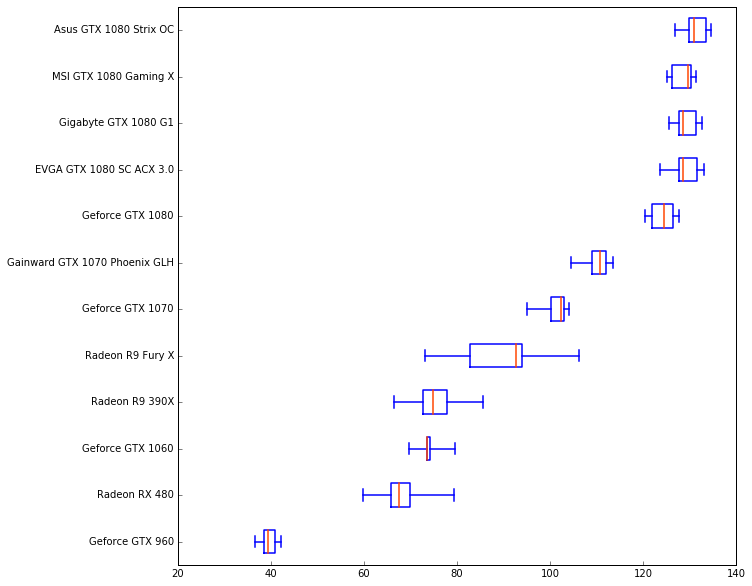

In [73]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1, 1, 1)
bp1 = ax1.boxplot(df.T.as_matrix(), notch=False, vert=False, whis='range')
plt.setp(bp1['whiskers'], linestyle='-', linewidth=1.5)
plt.setp(bp1['caps'], color='Blue', linewidth=1.5)
plt.setp(bp1['medians'], color='OrangeRed', linewidth=1.5)
plt.setp(bp1['boxes'], linewidth=1.5)
ax1.set_yticklabels(df.index)
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
plt.show()

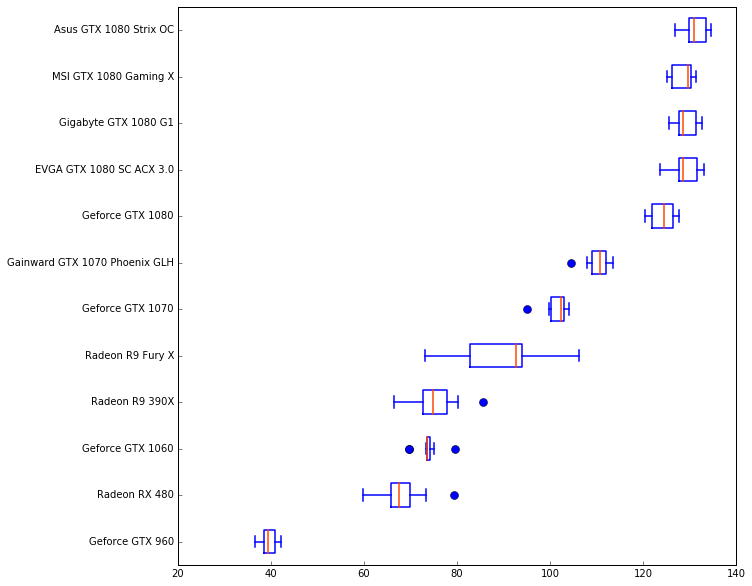

In [74]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1, 1, 1)
#mpld3.disable_notebook()
#fig, ax1 = plt.subplots()
#fig.set_figheight(10)
bp1 = ax1.boxplot(df.T.as_matrix(), notch=False, vert=False, whis=1.5)
plt.setp(bp1['fliers'], color='OrangeRed', marker='o', markersize=8)
plt.setp(bp1['whiskers'], linestyle='-', linewidth=1.5)
plt.setp(bp1['caps'], color='Blue', linewidth=1.5)
plt.setp(bp1['medians'], color='OrangeRed', linewidth=1.5)
plt.setp(bp1['boxes'], linewidth=1.5)
ax1.set_yticklabels(df.index)
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
plt.show()

# Interactive plot with plotly

In [75]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#poff.init_notebook_mode(connected=True) # run at the start of every ipython notebook to use plotly.offline
                     # this injects the plotly.js source files into the notebook


data = [dict() for x in range(len(df.index))]
highlight = ['Geforce GTX 1070', 'ASUS']
for i in range(len(df.index)):
    card = df.index[i]
    color='#009900'
    if card in highlight:
        color = '#000099'
    data[i] = go.Box(x = df.iloc[i], name = card, marker=dict(color=color), hoverinfo='all', boxpoints=False)

layout = {
    'autosize': False,
    'width': 700,
    'height': 800,
    'margin': go.Margin(
        l=250
        ),
    'title': 'Sweclockers prestandaindex 2016-08-02 (2 560 x 1 440 pixlar)',
    'xaxis': {
        'title': 'Högre är bättre (index)',
        'zeroline': False,
        'rangemode': 'tozero'
    },
    'showlegend' : False
}
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)
plot(fig)

'file://C:\\Users\\rsandstroem\\Documents\\WORK\\git\\IPythonNotebooks\\PrestandaIndex\\temp-plot.html'

# Interactive plot with Bokeh

I cannot make this horizontal, and the order of the cards is not he same as in the input data.

In [19]:
df_flat = pd.DataFrame(df.stack())
df_flat.reset_index(inplace=True)
df_flat.columns = ['Card', 'Game', 'Score']
df_flat.head()

,Card,Game,Score
0,Card0,A,0.646983
1,Card0,B,0.571455
2,Card0,C,0.703941
3,Card0,D,0.641846
4,Card0,E,0.697395


In [20]:
from bokeh.charts import BoxPlot, output_file, show

p = BoxPlot(df_flat, values='Score', label='Card', title="Dummy title",
           legend = False)

output_file("boxplot.html")

show(p)

# Interactive plot with mpld3

Output html does not show the proper axis labels.

In [7]:
#tooltip = mpld3.plugins.PointLabelTooltip(bp1, labels=labels)
#mpld3.plugins.connect(fig, tooltip)
#mpld3.save_html(fig,"test.html")
#mpld3.disable_notebook()
mpld3.save_html(fig,"test.html")
mpld3.fig_to_html(fig,template_type="simple")
mpld3.enable_notebook()
mpld3.display()

'file:///home/rikard/WORK/IPythonNotebooks/temp-plot.html'